In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle

In [3]:
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

In [4]:
os.chdir("C:\\Users\\hr\\Downloads\\ML_Practice\\Untitled_Folder\\WindSCADA")

In [5]:
data = pd.read_csv("C:\\Users\\hr\\Downloads\\ML_Practice\\Untitled_Folder\\WindSCADA\\scada_data.csv")

In [6]:
data_train = data.drop('WEC: Production kWh',axis=1)

In [7]:
data_test=data['WEC: Production kWh']

In [8]:
data_train.columns

Index(['DateTime', 'Time', 'Error', 'WEC: ava. windspeed',
       'WEC: max. windspeed', 'WEC: min. windspeed', 'WEC: ava. Rotation',
       'WEC: max. Rotation', 'WEC: min. Rotation', 'WEC: ava. Power',
       'WEC: max. Power', 'WEC: min. Power',
       'WEC: ava. Nacel position including cable twisting',
       'WEC: Operating Hours', 'WEC: Production minutes',
       'WEC: ava. reactive Power', 'WEC: max. reactive Power',
       'WEC: min. reactive Power', 'WEC: ava. available P from wind',
       'WEC: ava. available P technical reasons',
       'WEC: ava. Available P force majeure reasons',
       'WEC: ava. Available P force external reasons',
       'WEC: ava. blade angle A', 'Sys 1 inverter 1 cabinet temp.',
       'Sys 1 inverter 2 cabinet temp.', 'Sys 1 inverter 3 cabinet temp.',
       'Sys 1 inverter 4 cabinet temp.', 'Sys 1 inverter 5 cabinet temp.',
       'Sys 1 inverter 6 cabinet temp.', 'Sys 1 inverter 7 cabinet temp.',
       'Sys 2 inverter 1 cabinet temp.', 'Sys 2 

In [9]:
data_train['WEC: ava. windspeed'].describe()

count    49027.000000
mean         6.874626
std          3.694776
min          0.000000
25%          4.200000
50%          6.500000
75%          8.900000
max         32.099998
Name: WEC: ava. windspeed, dtype: float64

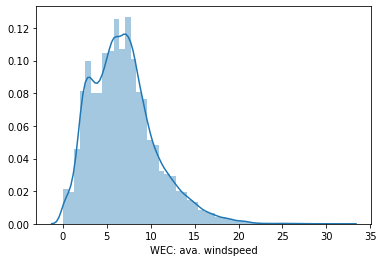

In [10]:
sns.distplot(data_train['WEC: ava. windspeed'])

In [9]:
correlation = data.corr()

In [11]:
correlation['WEC: ava. available P from wind'].sort_values(ascending=False)[:15]

WEC: ava. available P from wind                 1.000000
WEC: ava. Available P force external reasons    0.999321
WEC: ava. available P technical reasons         0.988453
WEC: ava. Available P force majeure reasons     0.964586
WEC: ava. windspeed                             0.793364
WEC: ava. Power                                 0.782353
WEC: max. windspeed                             0.761076
WEC: max. Power                                 0.747276
WEC: min. Power                                 0.744575
WEC: ava. reactive Power                        0.680802
Rotor temp. 1                                   0.645360
Rotor temp. 2                                   0.642798
WEC: min. reactive Power                        0.639643
Stator temp. 1                                  0.630705
Stator temp. 2                                  0.629206
Name: WEC: ava. available P from wind, dtype: float64

In [12]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.tail(30)

,Total,Percent
RTU: ava. Setpoint 1,0,0.0
Transformer temp.,0,0.0
Control cabinet temp.,0,0.0
Tower temp.,0,0.0
Ambient temp.,0,0.0
Fan inverter cabinet temp.,0,0.0
Yaw inverter cabinet temp.,0,0.0
Rectifier cabinet temp.,0,0.0
Main carrier temp.,0,0.0
Nacelle cabinet temp.,0,0.0


In [13]:
correlation['WEC: ava. available P from wind'].sort_values(ascending=False)[:20]

WEC: ava. available P from wind                 1.000000
WEC: ava. Available P force external reasons    0.999321
WEC: ava. available P technical reasons         0.988453
WEC: ava. Available P force majeure reasons     0.964586
WEC: ava. windspeed                             0.793364
WEC: ava. Power                                 0.782353
WEC: max. windspeed                             0.761076
WEC: max. Power                                 0.747276
WEC: min. Power                                 0.744575
WEC: ava. reactive Power                        0.680802
Rotor temp. 1                                   0.645360
Rotor temp. 2                                   0.642798
WEC: min. reactive Power                        0.639643
Stator temp. 1                                  0.630705
Stator temp. 2                                  0.629206
WEC: ava. Rotation                              0.592610
WEC: max. reactive Power                        0.579795
WEC: max. Rotation             

In [14]:
def outliers(x):
    return(np.abs(x-x.median())>1.5*(x.quantile(0.75)-x.quantile(0.25)))
#Replace the upper outlier with 95th Percentile and replace the lower outliers with 5th percentile.
def replace(x):
    out = x[outliers(x)]
    return(x.replace(to_replace = [out.min(),out.max()],value=[np.percentile(x,5),np.percentile(x,95)]))

In [15]:
outliers_total = outliers(data.iloc[:,3:65])
outliers_total.sum()[:30]

WEC: ava. windspeed                                   2686
WEC: max. windspeed                                   3994
WEC: min. windspeed                                   1795
WEC: ava. Rotation                                    4904
WEC: max. Rotation                                       0
WEC: min. Rotation                                    5327
WEC: ava. Power                                       5245
WEC: max. Power                                          0
WEC: min. Power                                       6406
WEC: ava. Nacel position including cable twisting     4362
WEC: Operating Hours                                     0
WEC: Production kWh                                      0
WEC: Production minutes                                  0
WEC: ava. reactive Power                              8210
WEC: max. reactive Power                              7509
WEC: min. reactive Power                              7153
WEC: ava. available P from wind                       48

In [19]:
import scipy.stats
import numpy as np

In [18]:
data['WEC: ava. available P from wind']= scipy.stats.mstats.winsorize(data['WEC: ava. available P from wind'],limits=0.05)

NameError: name 'scipy' is not defined

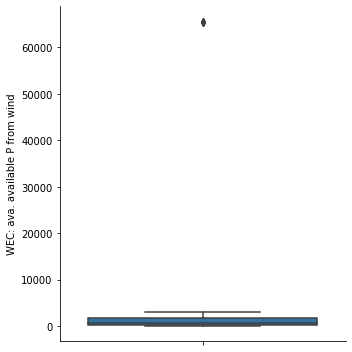

In [19]:
sns.catplot(y='WEC: ava. available P from wind',data=data,kind="box")

In [20]:
train = data[['WEC: ava. windspeed','Rotor temp. 1']]

In [21]:
test = data['WEC: ava. available P from wind']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.3,random_state=100)

In [24]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [25]:
model2 = RandomForestRegressor()

In [26]:
model2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [27]:
pred2 = model2.predict(x_test)

In [28]:
pred2

array([1694.        ,  214.55172108,  356.0307208 , ...,  783.27473726,
        434.22080268, 3064.82      ])

In [29]:
r2_score(y_test,pred2)

0.4773156498052499

In [30]:
#Saving the Model to Disk
pickle.dump(model2,open('wind-power-prediction.pkl','wb'))

In [31]:
model2.predict([[25,60]])

array([3018.2])

In [34]:
model2 = pickle.load(open('wind-power-prediction.pkl','rb'))
print(model2.predict([[6.54, 15.55]]))

[892.67142857]
